In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

In [52]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [53]:
data.describe

<bound method NDFrame.describe of          Time        V1        V2        V3        V4        V5        V6  \
0           0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1           0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2           1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3           1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...       ...       ...       ...       ...       ...       ...       ...   
124856  77448 -0.835868  0.673600  1.904021 -0.263201  0.351435  0.236937   
124857  77448 -2.817937 -0.107162  0.402607 -0.980962  0.682698  0.980801   
124858  77449 -1.262504  1.434804  0.290138 -0.436888  0.801078  0.380510   
124859  77449  1.087845  0.522904  0.275704  2.474583  0.213114 -0.225345   
124860  77449  1.181458 -0.125634  0.454633       NaN       NaN       NaN   

              V7        V8        V9  ...

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124861 entries, 0 to 124860
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    124861 non-null  int64  
 1   V1      124861 non-null  float64
 2   V2      124861 non-null  float64
 3   V3      124861 non-null  float64
 4   V4      124860 non-null  float64
 5   V5      124860 non-null  float64
 6   V6      124860 non-null  float64
 7   V7      124860 non-null  float64
 8   V8      124860 non-null  float64
 9   V9      124860 non-null  float64
 10  V10     124860 non-null  float64
 11  V11     124860 non-null  float64
 12  V12     124860 non-null  float64
 13  V13     124860 non-null  float64
 14  V14     124860 non-null  float64
 15  V15     124860 non-null  float64
 16  V16     124860 non-null  float64
 17  V17     124860 non-null  float64
 18  V18     124860 non-null  float64
 19  V19     124860 non-null  float64
 20  V20     124860 non-null  float64
 21  V21     12

In [55]:
data.shape

(124861, 31)

In [56]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [57]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

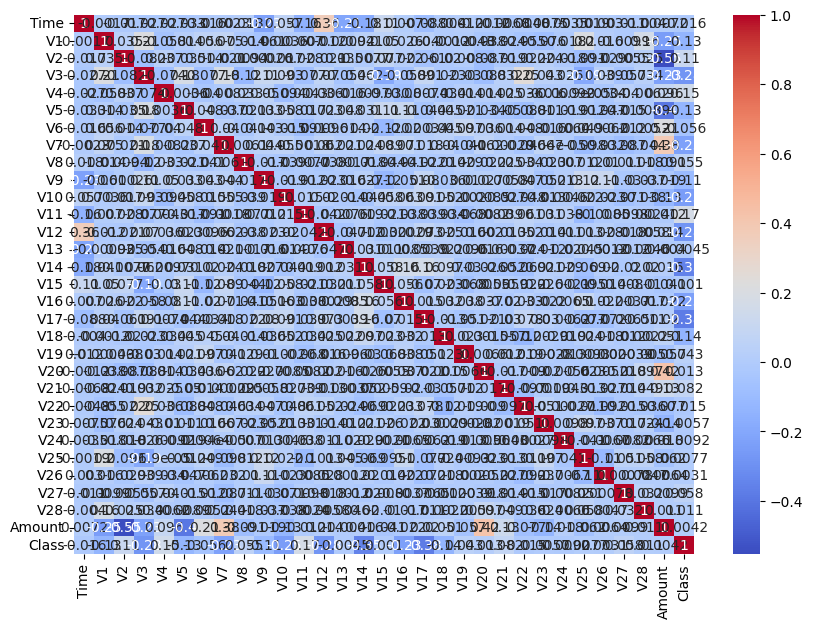

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [64]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [65]:
# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [66]:
# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=['Class'])
X = data_cleaned.drop('Class', axis=1)
y = data_cleaned['Class']

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Handle class imbalance using Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [70]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [71]:
# Make predictions
y_pred = clf.predict(X_test)

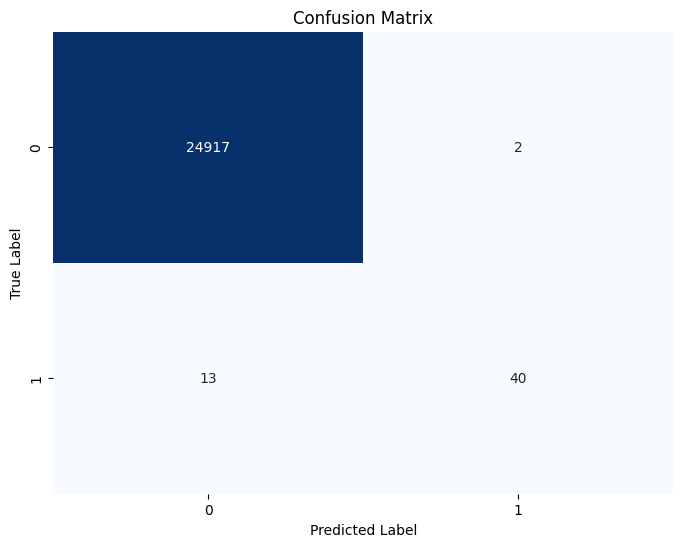

In [72]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [73]:
# Visualize ROC Curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

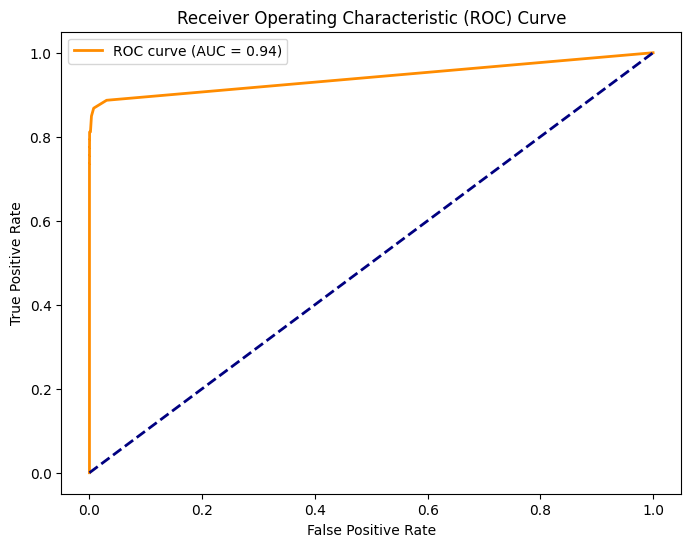

In [74]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()